<a href="https://colab.research.google.com/github/3iga/IThub/blob/main/yolo_sheep_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
#this one
rf = Roboflow(api_key="MdcIY8YYCUC1GrAOxGpz")
project = rf.workspace("zangar-0mch1").project("last_dataset-uj4oq")
version = project.version(2)
dataset = version.download("yolov8")


In [ ]:
rf = Roboflow(api_key="MdcIY8YYCUC1GrAOxGpz")
project = rf.workspace("zangar-0mch1").project("sheepdetection")
version = project.version(4)
dataset = version.download("yolov8")

In [ ]:
rf = Roboflow(api_key="MdcIY8YYCUC1GrAOxGpz")
project = rf.workspace("zangar-0mch1").project("sheepdetection")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
rf = Roboflow(api_key="MdcIY8YYCUC1GrAOxGpz")
project = rf.workspace("hewan1-yosi").project("domba")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/domba-1/data.yaml epochs=10 imgsz=640 plots=True

In [ ]:
#this one
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/last_dataset-2/data.yaml epochs=20 imgsz=640 plots=True

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/last_dataset-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

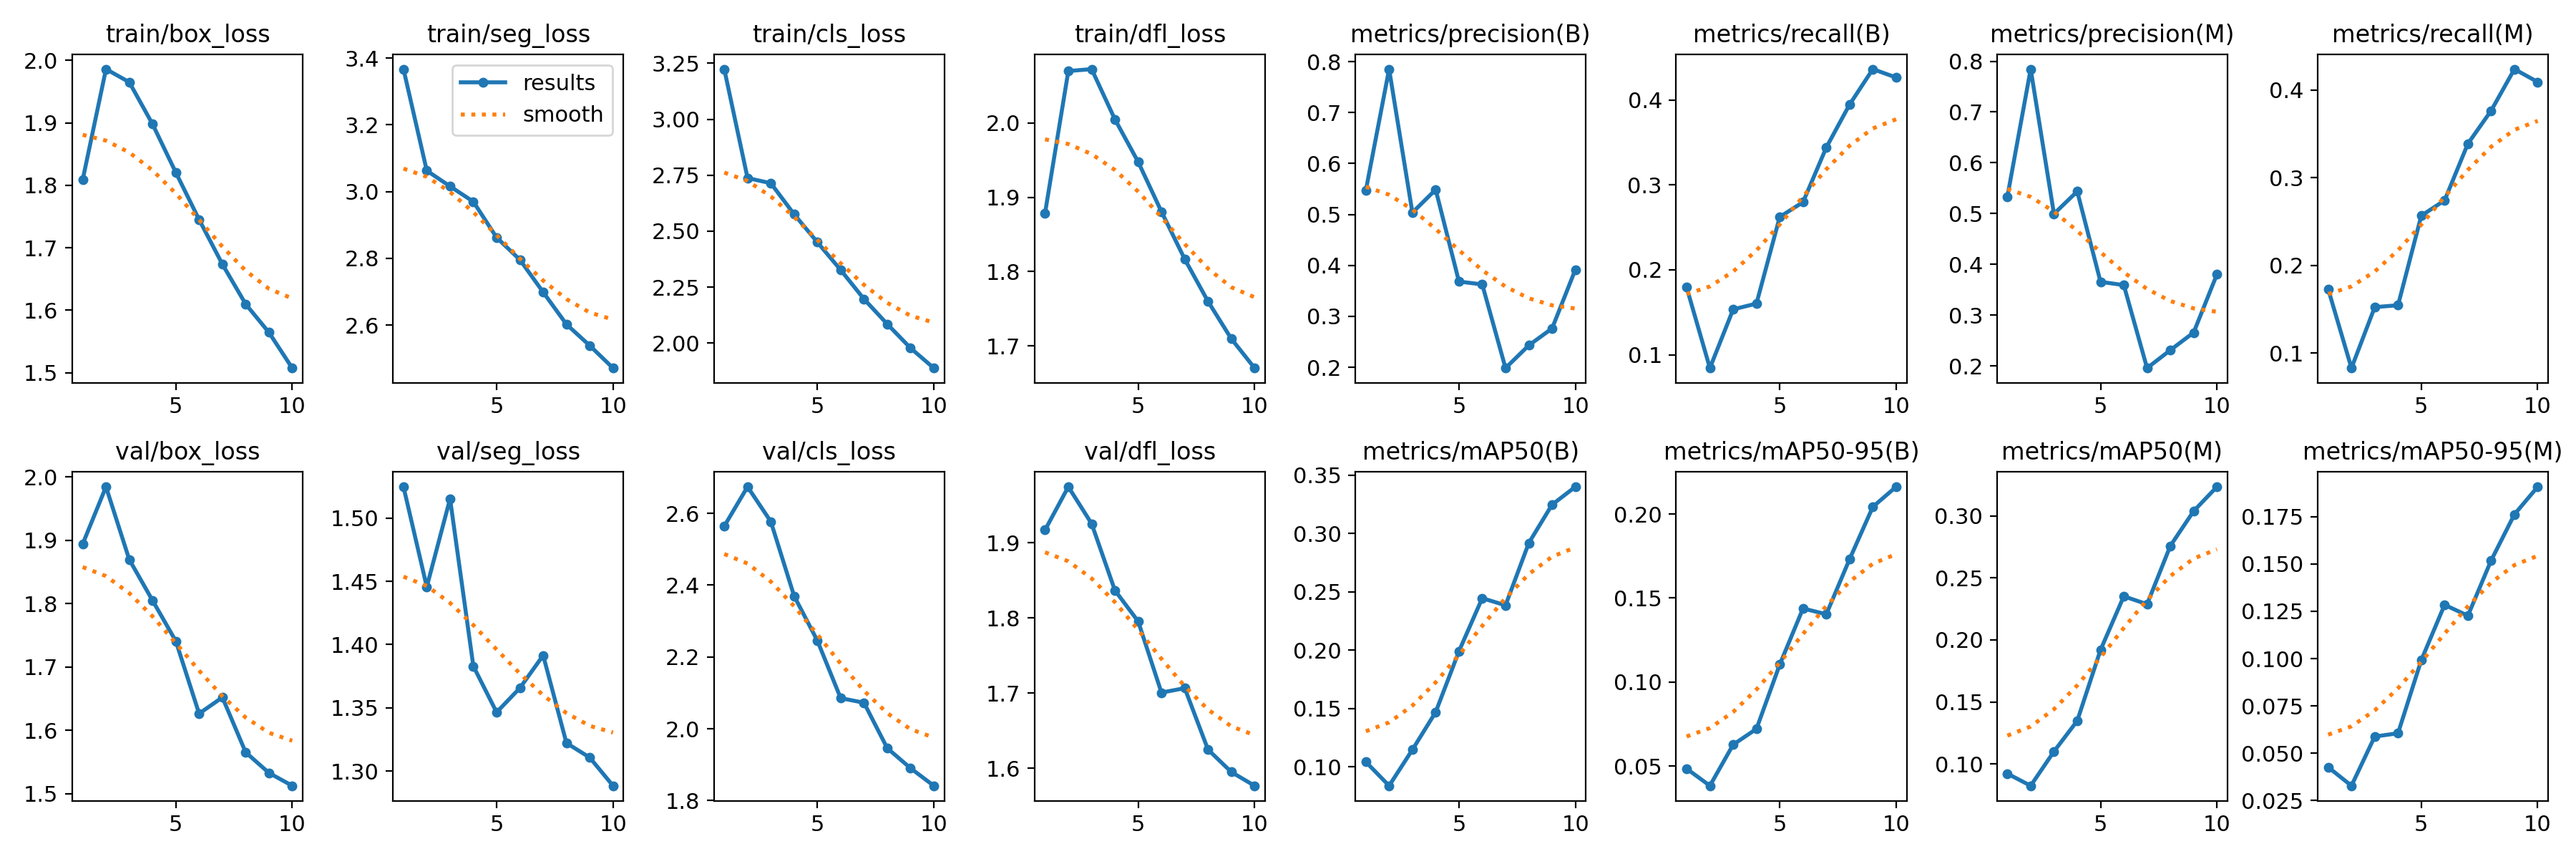

In [ ]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/segment/train2/results.png', width=600)

In [ ]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/segment/train2/weights/best.pt data=/content/last_dataset-1/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/last_dataset-1/valid/labels.cache... 964 images, 0 backgrounds, 0 corrupt: 100% 964/964 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 61/61 [00:25<00:00,  2.37it/s]
                   all        964       1599      0.391      0.427       0.34      0.216       0.38      0.409      0.324      0.191
                     0        964         11     0.0726      0.364      0.179      0.117     0.0726      0.364      0.179      0.104
                     1        964         55      0.352       0.71      0.513       0.32      0.325      0.656      0.447